## Imports

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
true = True
false = False

In [215]:
dTrain = pd.read_csv('train.csv')
dTest = pd.read_csv('test.csv')
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [193]:
dTrain.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [194]:
dTest.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


## Check for missing data

In [195]:
dTrain.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [196]:
dTest.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

### Check dataset description

In [197]:
dTrain.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [198]:
dTest.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


### Sample

In [199]:
dTest.sample(20)
dTrain.sample(20)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
148232,148232,Mercedes-Benz,AMG E 63 S 4MATIC,2017,54598,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,9-Speed Automatic,Black,Black,At least 1 accident or damage reported,Yes,42886
52040,52040,BMW,M5 Base,2018,30000,Gasoline,600.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,None reported,Yes,69500
184742,184742,Toyota,Camry LE,2005,113000,Gasoline,160.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,10900
135334,135334,Mercedes-Benz,SL-Class SL 550,2017,24933,Gasoline,429.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,65000
87432,87432,Mitsubishi,Montero Limited,2004,145000,Gasoline,215.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,–,None reported,Yes,10000
45641,45641,Land,Rover Range Rover 3.0L V6 Supercharged HSE,2020,63866,Gasoline,3.0 Liter,Automatic,Fuji White,–,None reported,NaN,279900
18141,18141,MINI,Cooper Base,2009,97496,Gasoline,118.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Silver,Black,None reported,Yes,5500
64735,64735,Hyundai,Santa Fe SEL Plus 2.4,2019,71962,Gasoline,185.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,None reported,Yes,33600
101295,101295,Hyundai,Elantra SE,2012,162000,Gasoline,145.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,5500
89015,89015,Jeep,Gladiator Willys,2022,5400,Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,None reported,Yes,27900


## Feature Engineering

### Extraction of features

#### Horse Power

In [200]:
def extractHP(model):
	if 'HP' in model.upper():
		return model.split('HP')[0]
	return None

dTrain['horse_power'] = dTrain['engine'].apply(extractHP)

# edit
dTest['hotse_power'] = dTrain['engine'].apply(extractHP)




,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horse_power
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,None


#### Engine Capacity

In [201]:
import re

def extractEngineCapacity(model):
	ec = re.search("\d+\.?\d*L", model)
	return ec[0][:-1] if ec != None else None

dTrain['engine_capacity'] = dTrain['engine'].apply(extractEngineCapacity)


# edit
dTest['engine_capacity'] = dTest['engine'].apply(extractEngineCapacity)



,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horse_power,engine_capacity
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0,6.2
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0,3.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0,4.0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,None,3.0


#### Car Age

In [202]:
from datetime import datetime

dTrain['model_age'] = datetime.now().year - dTrain['model_year']

# edit
dTest['model_age'] = datetime.now().year - dTest['model_year']

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horse_power,engine_capacity,model_age
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,17
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,22
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,22
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,7
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0,6.2,7
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0,3.0,6
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0,4.0,3
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,None,3.0,2


### Get Dummies

In [203]:
status = pd.get_dummies(dTrain['accident'], prefix='status')
status

,status_At least 1 accident or damage reported,status_None reported
0,False,True
1,True,False
2,False,True
3,False,True
4,False,True
...,...,...
188528,False,True
188529,True,False
188530,False,True
188531,False,True


#### Overwriting a column

In [204]:
dTrain['accident'] = status['status_At least 1 accident or damage reported'].apply(lambda x: True if x else False)


# edit
fstatus = pd.get_dummies(dTest['accident'], prefix='status')

dTest['accident'] = fstatus['status_At least 1 accident or damage reported'].apply(lambda x: True if x else False)

dTrain

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horse_power,engine_capacity,model_age
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,False,Yes,4200,172.0,1.6,17
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,True,Yes,4999,252.0,3.9,22
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,False,Yes,13900,320.0,5.3,22
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,False,Yes,45000,420.0,5.0,7
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,False,Yes,97500,208.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,False,Yes,27500,420.0,6.2,7
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,True,Yes,30000,385.0,3.0,6
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,False,Yes,86900,469.0,4.0,3
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,False,NaN,84900,None,3.0,2


### One-Hot Encoding

In [205]:
from sklearn.preprocessing import LabelEncoder

toEncode = [
	"brand",
	"fuel_type",
	"ext_col",
	"int_col",
	"transmission",
	
]

encoder = LabelEncoder()

for col in toEncode:
	dTrain[f"{col}_label"] = encoder.fit_transform(dTrain[col])
 
	# edit
	dTest[f"{col}_label"] = encoder.fit_transform(dTest[col])


dTrain

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,...,clean_title,price,horse_power,engine_capacity,model_age,brand_label,fuel_type_label,ext_col_label,int_col_label,transmission_label
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,...,Yes,4200,172.0,1.6,17,31,2,312,71,38
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,...,Yes,4999,252.0,3.9,22,28,2,263,10,38
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,...,Yes,13900,320.0,5.3,22,9,1,38,71,38
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,...,Yes,45000,420.0,5.0,7,16,2,29,14,49
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,...,Yes,97500,208.0,2.0,3,36,2,29,10,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,...,Yes,27500,420.0,6.2,7,8,2,304,10,49
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,...,Yes,30000,385.0,3.0,6,36,2,304,14,31
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,...,Yes,86900,469.0,4.0,3,36,2,304,14,23
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,...,NaN,84900,None,3.0,2,3,2,82,14,1


### Correlation Heatmap

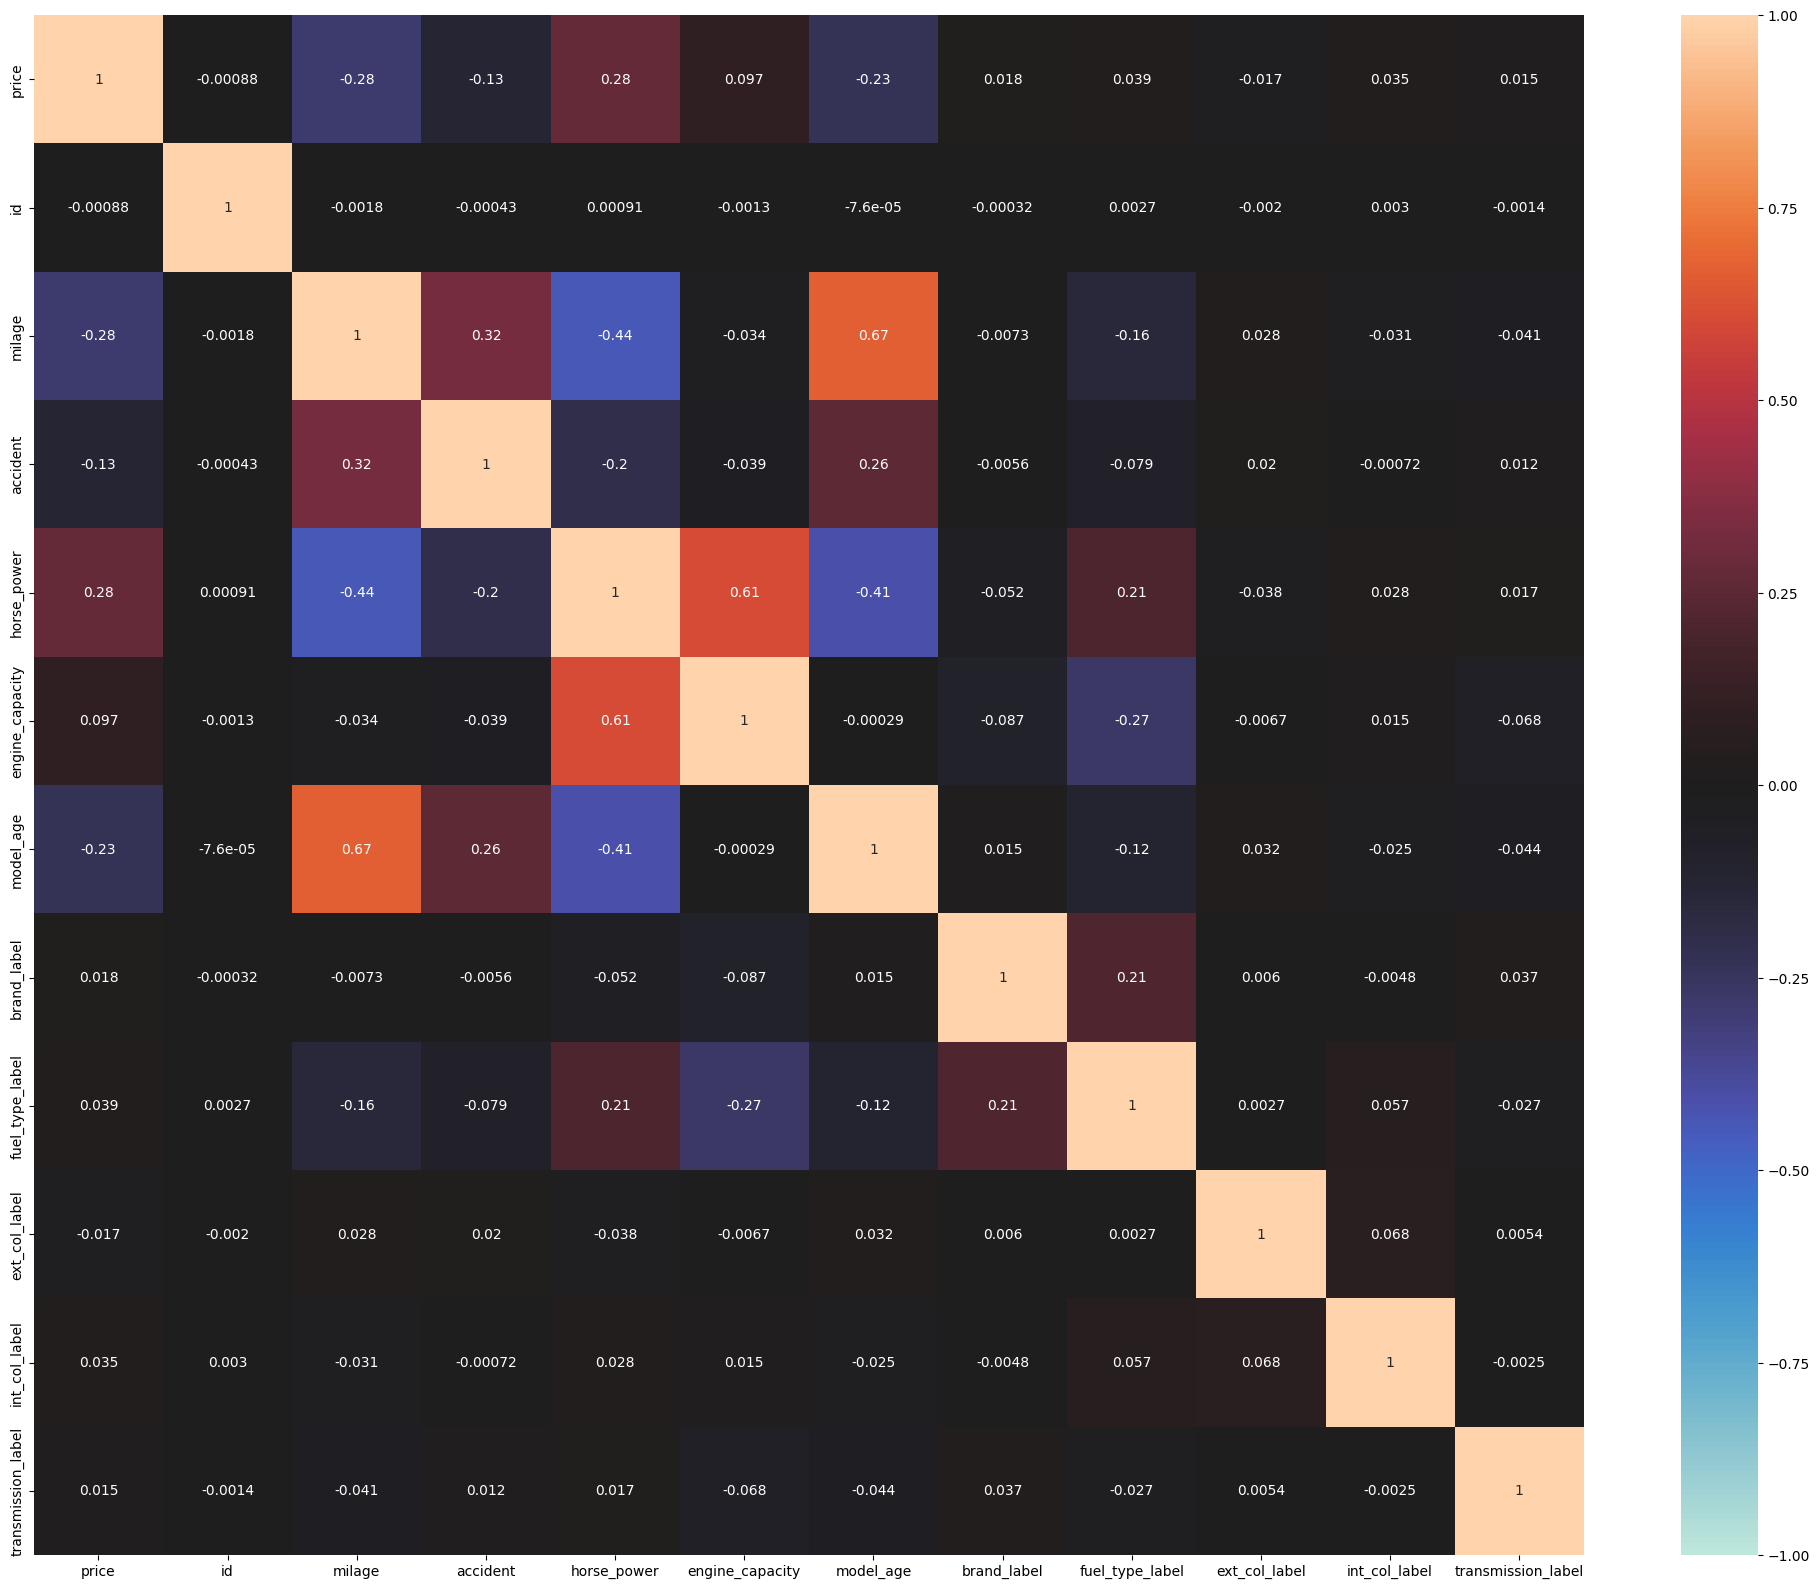

In [206]:

toDrop = [
	"clean_title",
	"model",
	"engine",
	"transmission",
	"model_year"
] + toEncode

# Removes duplicates
toDrop = list(dict.fromkeys(toDrop))
dTrain.drop(toDrop, axis = 1, inplace = True)

# edit
dTest.drop(toDrop, axis = 1, inplace = True)

correlation = dTrain.corr()
plt.figure(figsize = [25, 20])
sns.heatmap(correlation, annot = True, vmin = -1, vmax = 1, center = 0)
plt.show()

In [207]:
# View data
dTrain

,price,id,milage,accident,horse_power,engine_capacity,model_age,brand_label,fuel_type_label,ext_col_label,int_col_label,transmission_label
0,4200,0,213000,False,172.0,1.6,17,31,2,312,71,38
1,4999,1,143250,True,252.0,3.9,22,28,2,263,10,38
2,13900,2,136731,False,320.0,5.3,22,9,1,38,71,38
3,45000,3,19500,False,420.0,5.0,7,16,2,29,14,49
4,97500,4,7388,False,208.0,2.0,3,36,2,29,10,23
...,...,...,...,...,...,...,...,...,...,...,...,...
188528,27500,188528,49000,False,420.0,6.2,7,8,2,304,10,49
188529,30000,188529,28600,True,385.0,3.0,6,36,2,304,14,31
188530,86900,188530,13650,False,469.0,4.0,3,36,2,304,14,23
188531,84900,188531,13895,False,None,3.0,2,3,2,82,14,1


# Test Train

## Check for missing

In [208]:
dTrain.isnull().sum()

price                     0
id                        0
milage                    0
accident                  0
horse_power           33259
engine_capacity       14214
model_age                 0
brand_label               0
fuel_type_label           0
ext_col_label             0
int_col_label             0
transmission_label        0
dtype: int64

## Imputation

In [137]:
dTest.isnull().sum()

In [209]:
toImpute = [
	"horse_power",
	"engine_capacity"
]

for col in toImpute:
	imputer = SimpleImputer(strategy = 'mean')
	dTrain[col] = imputer.fit_transform(dTrain[[col]])
#  edit
	dTest[col] = imputer.fit_transform(dTest[[col]])

## Create model (Training)

In [210]:
from sklearn.linear_model import LinearRegression

defaultDrop = [
	"price"
]

toDropTrain = [
	
] + defaultDrop

randomState = 42

### Median

In [211]:
# Put your answer here
x = dTrain.drop(toDropTrain, axis = 1)
x = sm.add_constant(x)
y = dTrain['price']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = randomState
) 

In [212]:
model = LinearRegression()
model.fit(x_train, y_train)
    
y_pred_median = model.predict(x_test)
median_mse = mean_squared_error(y_test, y_pred_median, squared = False)

In [ ]:
ty_pred_median = model.predict(dTest)

## Evaluation Output (Training)

In [213]:
print(f"Median MSE: {median_mse}")


Median MSE: 70447.55360516711


In [214]:
print(x_train.columns)


Index(['const', 'id', 'milage', 'accident', 'horse_power', 'engine_capacity',
       'model_age', 'brand_label', 'fuel_type_label', 'ext_col_label',
       'int_col_label', 'transmission_label'],
      dtype='object')
